In [204]:
from warnings import filterwarnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
filterwarnings('ignore')



In [205]:
Data = pd.read_csv('Skin_NonSkin.txt', sep ='\t', names = ['B','G','R', 'Skin or No-skin'])

In [206]:
Data.head()

,B,G,R,Skin or No-skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [207]:
Data.shape

(245057, 4)

In [208]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   B                245057 non-null  int64
 1   G                245057 non-null  int64
 2   R                245057 non-null  int64
 3   Skin or No-skin  245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


In [209]:
Data.describe()

,B,G,R,Skin or No-skin
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [210]:
Data['Skin or No-skin'].value_counts()

2    194198
1     50859
Name: Skin or No-skin, dtype: int64

In [211]:
tot = len(Data.index)
tot_1 = len(Data['Skin or No-skin'][Data['Skin or No-skin'] ==1])
tot_2 = len(Data['Skin or No-skin'][Data['Skin or No-skin'] ==2])
tot_1_percent = (tot_1/tot)*100
tot_2_percent = (tot_2/tot)*100
print(f'Percentage of Skin is: {tot_1_percent}% \nPercentage of No-skin is {tot_2_percent}%')

Percentage of Skin is: 20.753947040892527% 
Percentage of No-skin is 79.24605295910747%


In [214]:
new_column = pd.get_dummies(Data['Skin or No-skin'])
new_column.drop(2, axis = 1, inplace = True)

In [215]:
new_column.columns = ['Skin or No-skin']

In [216]:
Data.drop('Skin or No-skin', axis =1, inplace=True)

In [217]:
Data.head()

,B,G,R
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119


In [218]:
Data = pd.concat([Data, new_column], axis =1)

Data.head()

,B,G,R,Skin or No-skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [219]:
Data['Skin or No-skin'].value_counts()

0    194198
1     50859
Name: Skin or No-skin, dtype: int64

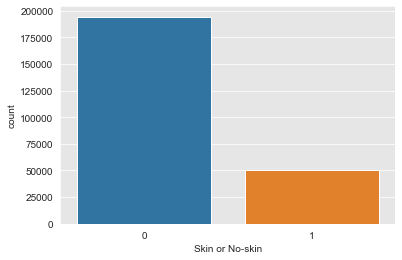

In [220]:
sns.countplot(Data['Skin or No-skin'])

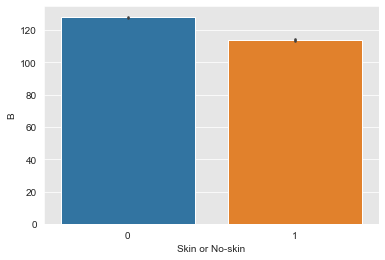

In [221]:
sns.barplot(x= 'Skin or No-skin', y= 'B', data = Data)

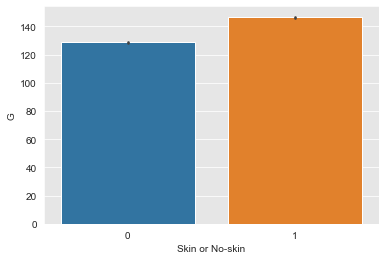

In [222]:
sns.barplot(x= 'Skin or No-skin', y= 'G', data = Data)

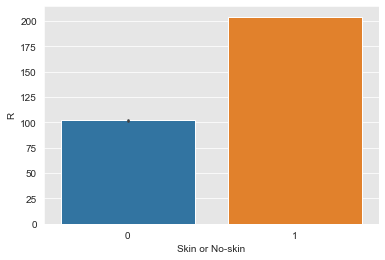

In [223]:
sns.barplot(x= 'Skin or No-skin', y= 'R', data = Data)

In [224]:
X = Data[['B','G','R']]
y = Data['Skin or No-skin']

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 30)

In [227]:
from sklearn.linear_model import LogisticRegression

In [148]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
predict = logmodel.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [153]:
accu = accuracy_score(y_test, predict)
print(f'Accuracy is: {accu*100:.3f}%')

Accuracy is: 91.988%


In [154]:
c_r = classification_report(y_test, predict)
print(c_r)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     38867
           1       0.79      0.83      0.81     10145

    accuracy                           0.92     49012
   macro avg       0.87      0.89      0.88     49012
weighted avg       0.92      0.92      0.92     49012



In [156]:
a_s = confusion_matrix(y_test, predict)
print(a_s)

[[36682  2185]
 [ 1742  8403]]


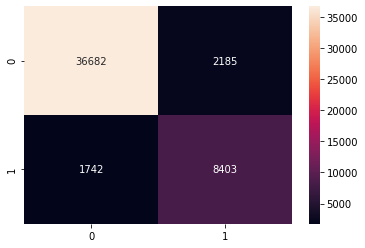

In [161]:
sns.heatmap(a_s, annot = True, fmt ='d')

In [162]:
#Evaluate ROC curve
from sklearn.metrics import roc_curve, auc

In [197]:
y_score = logmodel.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC is 0.9516220263254362


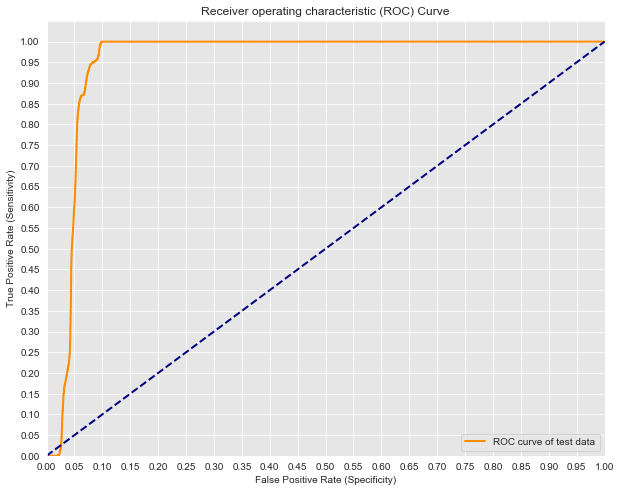

In [198]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC is {}'.format(auc(fpr, tpr)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve of test data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(Data[['B','G','R']])

In [168]:
scale_train,scale_test,result_train,result_test = train_test_split(x_scaled,
                                                                  y,
                                                                  test_size = 0.2,
                                                                  random_state = 11)

In [169]:
logmodel.fit(scale_train, result_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
predict2 = logmodel.predict(scale_test)

In [195]:
accu = accuracy_score(result_test, predict2)
print(f'Accuracy is: {accu*100:.3f}%')

Accuracy is: 92.098%
